<h1>Histogram ilosci znakow(z stopwords)</h1>

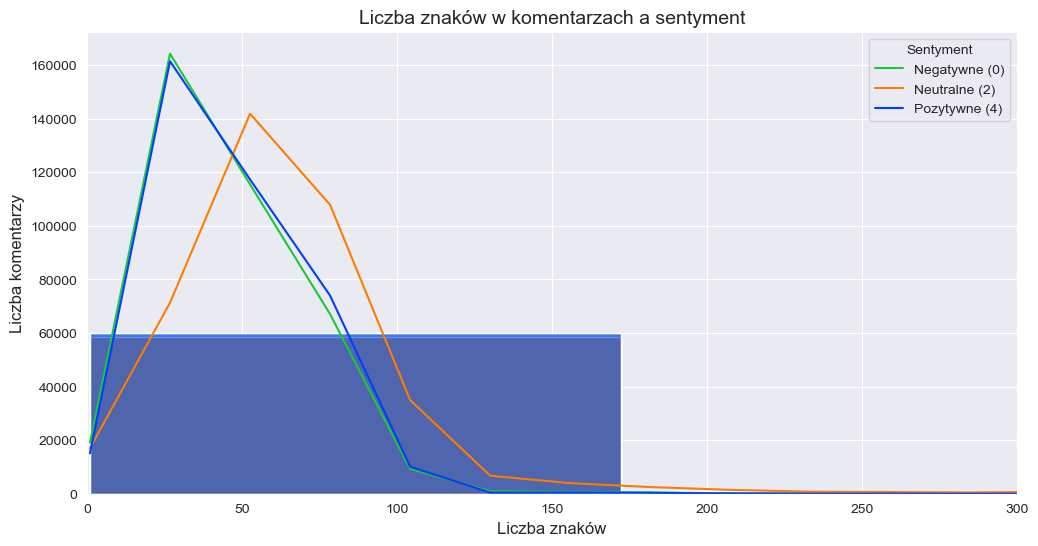

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpld3  # 🔥 To sprawia, że Seaborn będzie interaktywny w przeglądarce!
from fastapi import FastAPI
from fastapi.responses import HTMLResponse



df = pd.read_csv(r"C:\Users\User\PycharmProjects\sentiment\finaldata\przefiltrowanebezprezydentapowinnobycok.csv")



df["char_count"] = df["text"].apply(len)

sns.set_style("darkgrid")

# Tworzenie histogramu
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="char_count", hue="sentiment", bins=30, kde=True, alpha=0.6, palette="bright")

# Ograniczenie zakresu X do 300 znakow
plt.xlim(0, 300)

# Opisy osi i tytuł
plt.title("Liczba znaków w komentarzach a sentyment", fontsize=14)
plt.xlabel("Liczba znaków", fontsize=12)
plt.ylabel("Liczba komentarzy", fontsize=12)

# Ustawienie legendy
plt.legend(title="Sentyment", labels=["Negatywne (0)", "Neutralne (2)", "Pozytywne (4)"])


plt.savefig(r"C:\Users\User\PycharmProjects\sentiment\src\static\wykres1.svg", format="svg")


# Wyświetlenie wykresu
plt.show()


<h1>Histogram ilosci slow(z stop words)</h1>

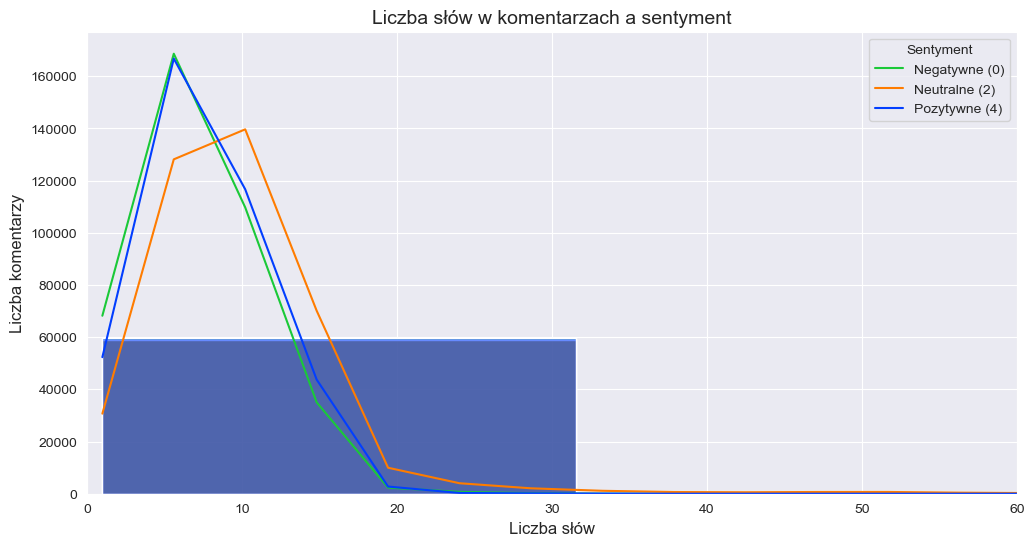

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\User\PycharmProjects\sentiment\finaldata\przefiltrowanebezprezydentapowinnobycok.csv")

# Dodanie kolumny z liczbą znaków i słów w komentarzu
df["char_count"] = df["text"].apply(len)
df["word_count"] = df["text"].apply(lambda x: len(x.split()))

sns.set_style("darkgrid")

# Tworzenie histogramu dla liczby słów
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="word_count", hue="sentiment", bins=30, kde=True, alpha=0.6, palette="bright")

# Ograniczenie zakresu X do 60 slow
plt.xlim(0, 60)

# Opisy osi i tytuł
plt.title("Liczba słów w komentarzach a sentyment", fontsize=14)
plt.xlabel("Liczba słów", fontsize=12)
plt.ylabel("Liczba komentarzy", fontsize=12)

# Ustawienie legendy
plt.legend(title="Sentyment", labels=["Negatywne (0)", "Neutralne (2)", "Pozytywne (4)"])


plt.savefig(r"C:\Users\User\PycharmProjects\sentiment\src\static\wykres2.svg", format="svg")



plt.show()


<h1>Wystapienia najczesciej pojawiajacych sie slow(z stop wordsami)</h1>

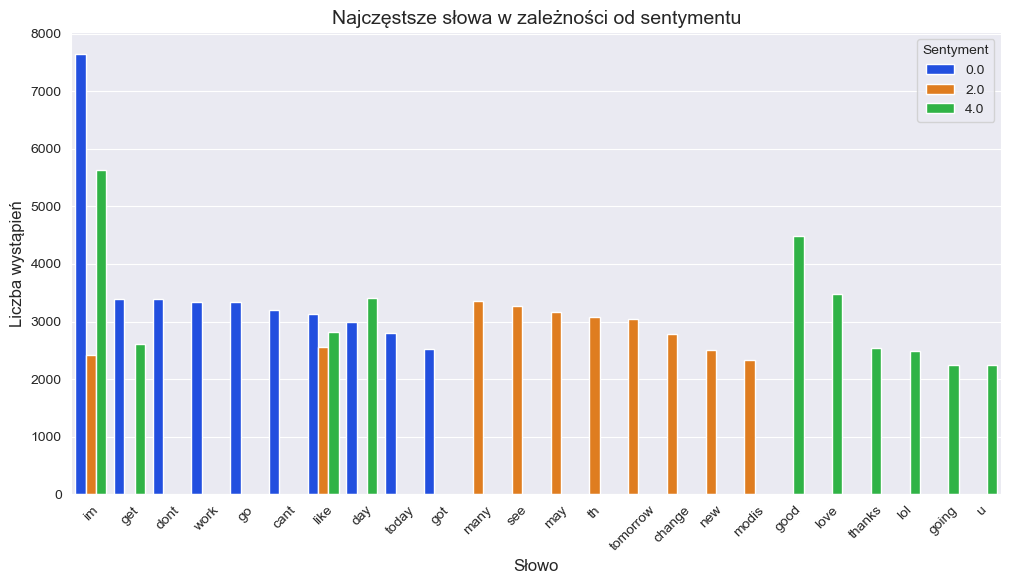

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
top_words = 10  # Liczba najczęstszych słów
sentiments = df["sentiment"].unique()
data = []

for sentiment in sentiments:
    words = " ".join(df[df["sentiment"] == sentiment]["text"]).split()
    most_common = Counter(words).most_common(top_words)

    for word, count in most_common:
        data.append({"Słowo": word, "Liczba wystąpień": count, "Sentyment": sentiment})

df_words = pd.DataFrame(data)

# Tworzenie wykresu
plt.figure(figsize=(12, 6))
sns.barplot(data=df_words, x="Słowo", y="Liczba wystąpień", hue="Sentyment", palette="bright")

# Opisy osi
plt.xlabel("Słowo", fontsize=12)
plt.ylabel("Liczba wystąpień", fontsize=12)
plt.title("Najczęstsze słowa w zależności od sentymentu", fontsize=14)


plt.savefig(r"C:\Users\User\PycharmProjects\sentiment\src\static\wykres3.svg", format="svg")


plt.show()

<h1>Wystapienia najczesciej pojawiajacych sie slow(bez stop words)</h1>

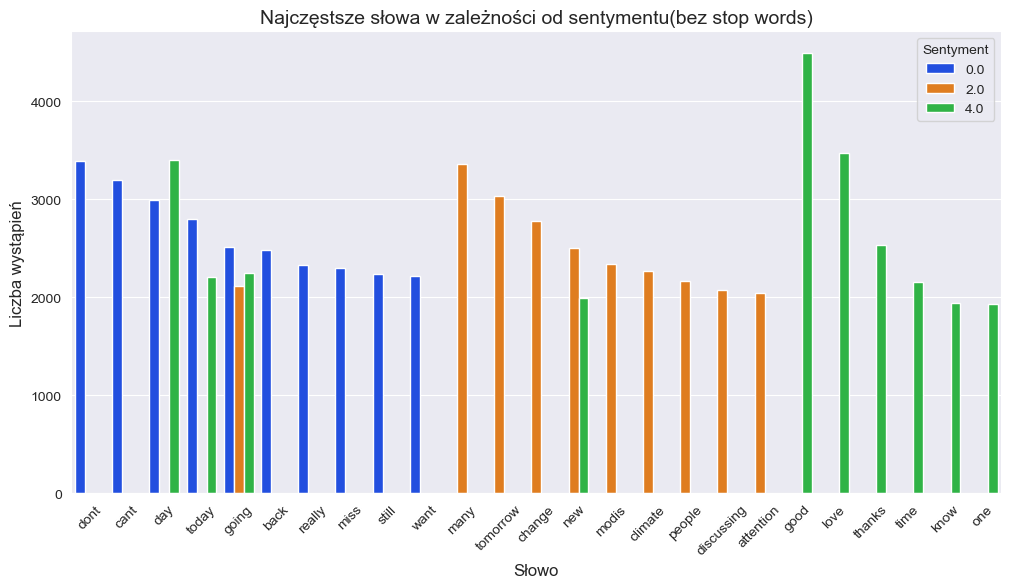

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
df1 = pd.read_csv(r"C:\Users\User\PycharmProjects\sentiment\finaldata\przefiltrowanebezprezydentapowinnobycokdlaprostych.csv")

top_words = 10  
sentiments = df1["sentiment"].unique()
data = []

for sentiment in sentiments:
    words = " ".join(df1[df1["sentiment"] == sentiment]["text"]).split()
    most_common = Counter(words).most_common(top_words)
    
    for word, count in most_common:
        data.append({"Słowo": word, "Liczba wystąpień": count, "Sentyment": sentiment})

df_words = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_words, x="Słowo", y="Liczba wystąpień", hue="Sentyment", palette="bright")

plt.xlabel("Słowo", fontsize=12)
plt.ylabel("Liczba wystąpień", fontsize=12)
plt.title("Najczęstsze słowa w zależności od sentymentu(bez stop words)", fontsize=14)

plt.savefig(r"C:\Users\User\PycharmProjects\sentiment\src\static\wykres4.svg", format="svg")


plt.show()

<h1>Histogram ilosci znakow(bez stopwords)</h1>


sentiment
0.0    59796
4.0    59740
2.0    59710
Name: count, dtype: int64


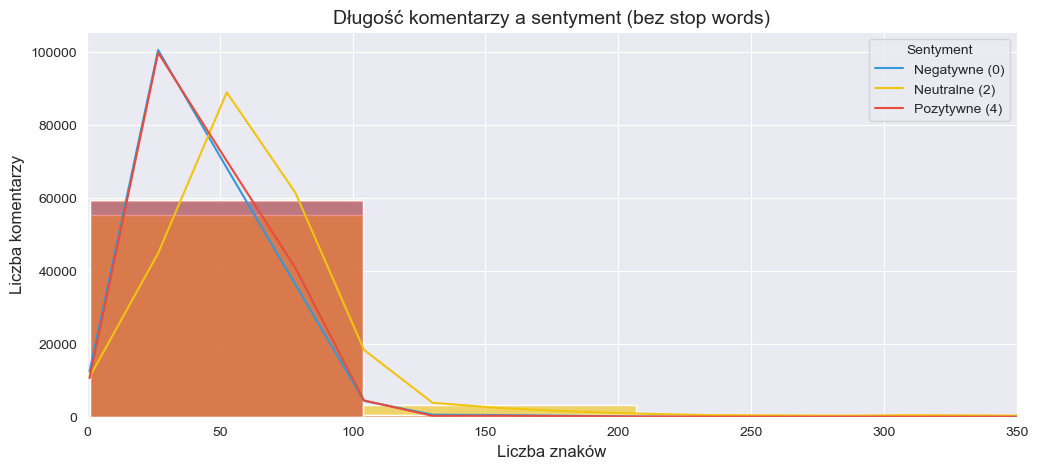

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print(df1['sentiment'].value_counts())
df1["text_length"] = df1["text"].apply(len)
sns.set_style("darkgrid")


custom_palette = {0.0: "#E74C3C",  
                  2.0: "#F1C40F",  
                  4.0: "#3498DB"} 


plt.figure(figsize=(12,5))
sns.histplot(data=df1, x="text_length", hue="sentiment", bins=50, kde=True,alpha=0.6, palette=custom_palette)
plt.xlim(0, 350)

plt.title("Długość komentarzy a sentyment (bez stop words)", fontsize =14)
plt.xlabel("Liczba znaków", fontsize =12)
plt.ylabel("Liczba komentarzy", fontsize =12)

plt.legend(title="Sentyment", labels=["Negatywne (0)", "Neutralne (2)", "Pozytywne (4)"])
plt.savefig(r"C:\Users\User\PycharmProjects\sentiment\src\static\wykres5.svg", format="svg")



plt.draw()

plt.show()


<h1>Histogram ilosci słów(bez stopwords)</h1>

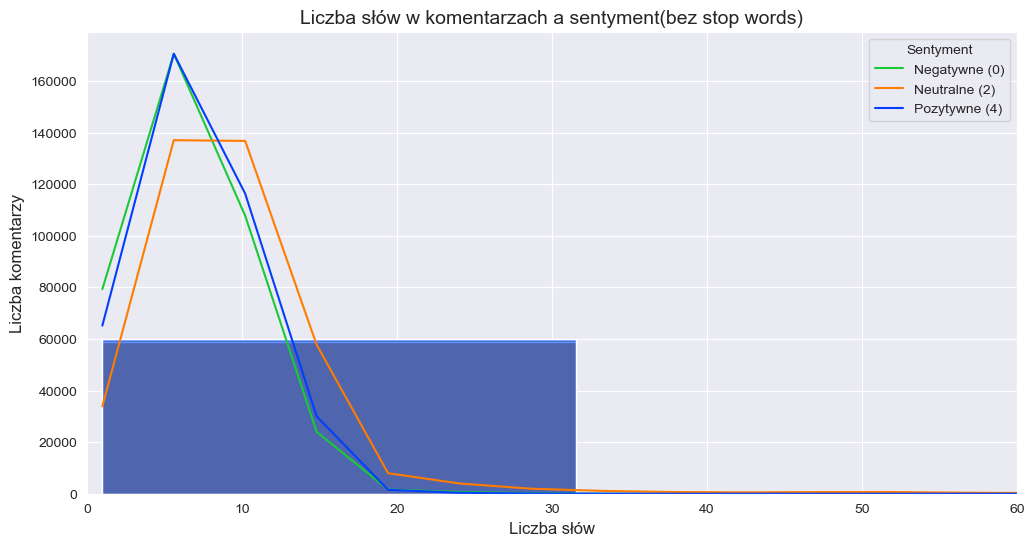

In [13]:
df1.groupby("sentiment")["text_length"].mean()
df1["word_count"] = df1["text"].apply(lambda x: len(x.split()))
sns.set_style("darkgrid")

plt.figure(figsize=(12,6))
sns.histplot(data=df1, x="word_count", hue="sentiment", bins=30, kde=True, alpha=0.6, palette="bright")

plt.xlim(0, 60) #ograniczenie do 60 slow

# Opisy osi i tytuł
plt.title("Liczba słów w komentarzach a sentyment(bez stop words)", fontsize=14)
plt.xlabel("Liczba słów", fontsize=12)
plt.ylabel("Liczba komentarzy", fontsize=12)

# Ustawienie legendy
plt.legend(title="Sentyment", labels=["Negatywne (0)", "Neutralne (2)", "Pozytywne (4)"])
plt.savefig(r"C:\Users\User\PycharmProjects\sentiment\src\static\wykres6.svg", format="svg")


# Wyświetlenie wykresu
plt.show()


<h1>Analiza bigramów i trigramów</h1>


Najczęstsze bigramy dla sentymentu 0.0:
[('dont know', 470), ('im sorry', 439), ('im going', 429), ('dont want', 399), ('feel like', 392), ('im gonna', 326), ('dont think', 245), ('looks like', 241), ('dont like', 217), ('im sad', 200)]

Najczęstsze trigramy dla sentymentu 0.0:
[('im gonna miss', 83), ('im going miss', 54), ('hope feel better', 49), ('dont feel like', 46), ('dont feel good', 45), ('feel like im', 43), ('getting ready work', 42), ('im sorry hear', 41), ('help good home', 40), ('lost help good', 40)]

Najczęstsze bigramy dla sentymentu 2.0:
[('climate change', 2162), ('global warming', 1458), ('interesting things', 1050), ('lately interesting', 1049), ('people discussing', 1049), ('things evolve', 1049), ('discussions online', 1034), ('new trends', 1034), ('online noticed', 1034), ('shaping discussions', 1034)]

Najczęstsze trigramy dla sentymentu 2.0:
[('interesting things evolve', 1049), ('lately interesting things', 1049), ('discussions online noticed', 1034), ('shap

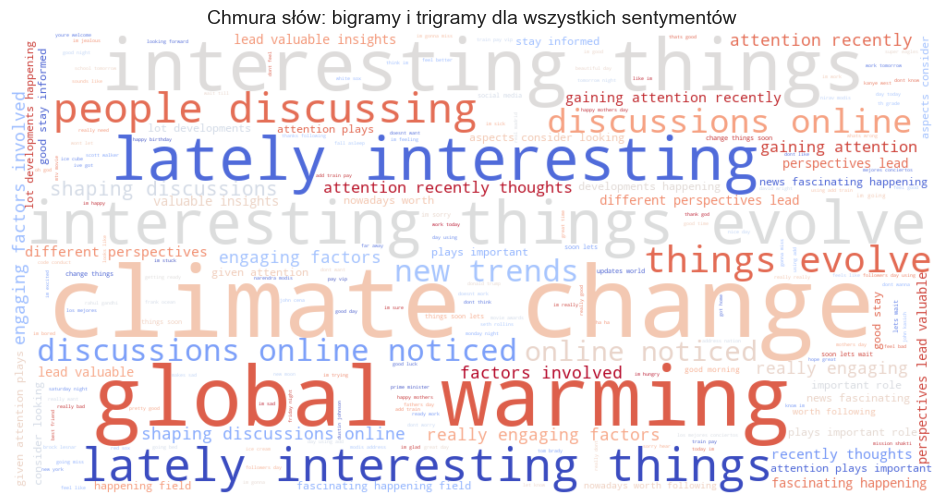

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


def get_top_ngrams(texts, ngram_range=(2, 2), top_n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(texts)
    ngram_counts = Counter(dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1)))
    return ngram_counts.most_common(top_n)

all_ngrams = {}

# Analiza dla każdego sentymentu
for sentiment in df['sentiment'].unique():
    ngrams = get_top_ngrams(df[df["sentiment"] == sentiment]["text"], (2, 3), 100)

    print(f"\nNajczęstsze bigramy dla sentymentu {sentiment}:")
    print(get_top_ngrams(df[df['sentiment'] == sentiment]['text'], (2, 2), 10))

    print(f"\nNajczęstsze trigramy dla sentymentu {sentiment}:")
    print(get_top_ngrams(df[df['sentiment'] == sentiment]['text'], (3, 3), 10))
    for ngram, freq in ngrams:
        all_ngrams[ngram] = freq
    
    
wordcloud = WordCloud(
    width=1000, height=500, background_color="white",
    colormap="coolwarm", max_words=200
).generate_from_frequencies(all_ngrams)

# Rysowanie chmury słów
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Chmura słów: bigramy i trigramy dla wszystkich sentymentów", fontsize=14)
plt.savefig(r"C:\Users\User\PycharmProjects\sentiment\src\static\wykres7.svg", format="svg")

plt.show()


def generate_wordcloud(ngrams):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(dict(ngrams))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

    plt.show()

# WordCloud dla bigramów w komentarzach pozytywnych
# positive_bigrams = get_top_ngrams(df[df['sentiment'] == 4]['text'], (2, 2), 20)
# generate_wordcloud(positive_bigrams)

sentiment_colors = {
    0: "red",    # Negatywne
    2: "gray",   # Neutralne
    4: "green"   # Pozytywne
}








def plot_top_ngrams(ngrams, title="Najczęstsze n-gramy"):
    ngrams, counts = zip(*ngrams)
    plt.figure(figsize=(10, 5))
    plt.barh(ngrams, counts, color="royalblue")
    plt.xlabel("Liczba wystąpień")
    plt.ylabel("N-gramy")
    plt.title(title)
    plt.gca().invert_yaxis()

    plt.show()




# Przykład wizualizacji dla bigramów w komentarzach neutralnych
# neutral_bigrams = get_top_ngrams(df[df['sentiment'] == 2]['text'], (2, 2), 10)
# plot_top_ngrams(neutral_bigrams, "Najczęstsze bigramy w neutralnych komentarzach")

<h1>Emocjonalny profil tekstu </h1>

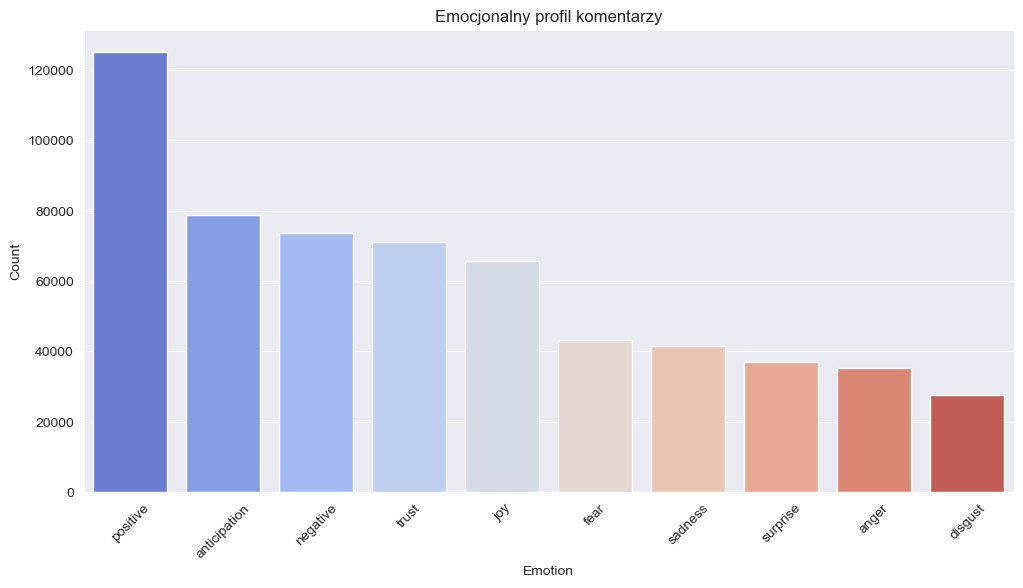

In [15]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie NRC Emotion Lexicon
nrc_lexicon = pd.read_csv(r"C:\Users\User\PycharmProjects\sentiment\finaldata\NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", 
                           sep="\t", names=["word", "emotion", "association"])

# Przefiltrowanie tylko tych słów, które są skojarzone z emocjami
nrc_lexicon = nrc_lexicon[nrc_lexicon["association"] == 1].drop("association", axis=1)

# Wczytanie Twojego datasetu z komentarzami
nrc_words = set(nrc_lexicon["word"])  # Tworzymy zbiór słów do wyszukiwania O(1)


# Tokenizacja i analiza emocji
def analyze_emotions(text):
    words = word_tokenize(text.lower())
    emotions = defaultdict(int)
    
    for word in words:
       if word in nrc_words:

            matching_emotions = nrc_lexicon[nrc_lexicon["word"] == word]["emotion"].values
            for emotion in matching_emotions:
                emotions[emotion] += 1
                
    return emotions

df["emotions"] = [analyze_emotions(text) for text in df["text"]]

# Liczenie wystąpień emocji
emotion_counts = defaultdict(int)

for emotions in df["emotions"]:
    for emotion, count in emotions.items():
        emotion_counts[emotion] += count

# Tworzenie DataFrame z wynikami
emotion_df = pd.DataFrame(list(emotion_counts.items()), columns=["Emotion", "Count"])
emotion_df = emotion_df.sort_values(by="Count", ascending=False)


# Wizualizacja emocji
plt.figure(figsize=(12, 6))
sns.barplot(x="Emotion", y="Count", hue="Emotion",  data=emotion_df, palette="coolwarm", legend=False)
plt.title("Emocjonalny profil komentarzy")
plt.xticks(rotation=45)
plt.savefig(r"C:\Users\User\PycharmProjects\sentiment\src\static\wykres8.svg", format="svg")

plt.show()



<h1>Roznorodnosc słownictwa(entropia)</h1>

sentiment
0.0    11.641972
2.0    12.519901
4.0    11.843480
Name: text, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_2156\83211436.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=entropy_values.index, y=entropy_values.values, palette="viridis")


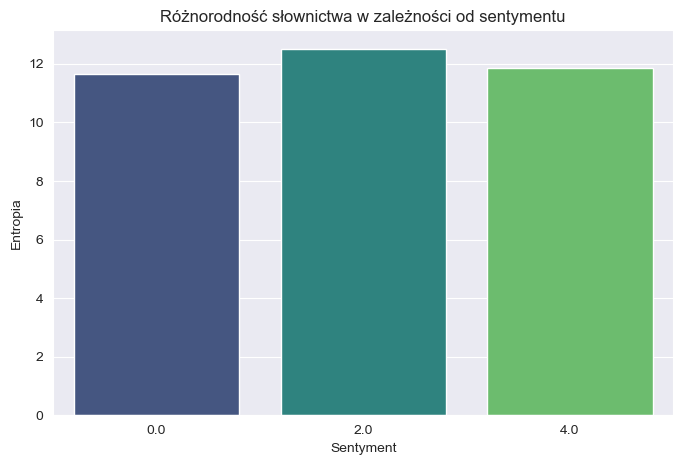

In [16]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def compute_entropy(texts):
    all_words = [word.lower() for text in texts for word in word_tokenize(text)]
    word_counts = Counter(all_words)
    total_words = sum(word_counts.values())
    probs = [count / total_words for count in word_counts.values()]
    return -sum(p * np.log2(p) for p in probs)

# Obliczanie entropii dla każdej klasy sentymentu
entropy_values = df.groupby("sentiment")["text"].apply(compute_entropy)

# Wyświetlenie wyników
print(entropy_values)



plt.figure(figsize=(8, 5))
sns.barplot(x=entropy_values.index, y=entropy_values.values, palette="viridis")
plt.xlabel("Sentyment")
plt.ylabel("Entropia")
plt.title("Różnorodność słownictwa w zależności od sentymentu")
plt.savefig(r"C:\Users\User\PycharmProjects\sentiment\src\static\wykres9.svg", format="svg")

plt.show()



<h1>Analiza czesci mowy</h1>

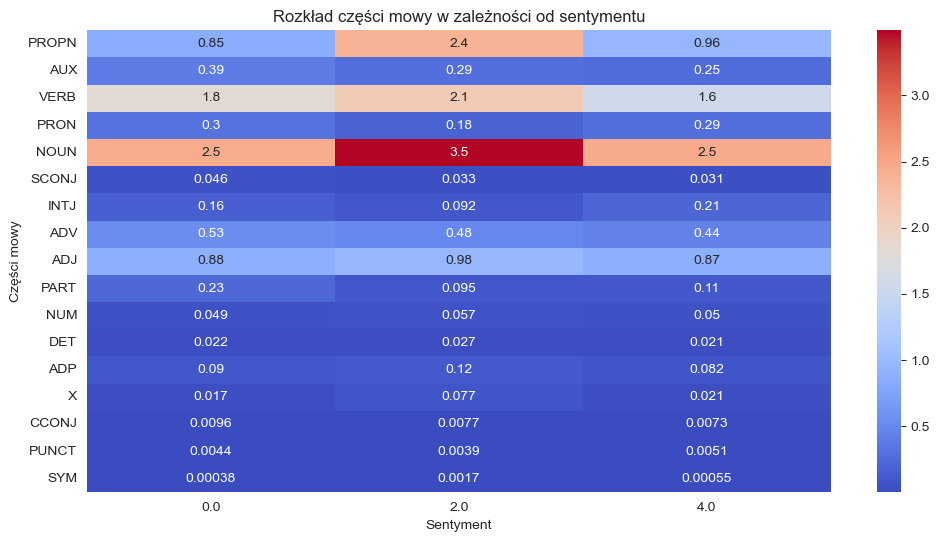

In [13]:
import spacy
import pandas as pd
from collections import Counter

#model spacy
nlp = spacy.load("en_core_web_sm")

# Funkcja do analizy części mowy
def analyze_pos(text):
    doc = nlp(text)
    pos_counts = Counter([token.pos_ for token in doc])  # Zliczanie POS
    return pos_counts

# Przykładowe dane 
df['pos_counts'] = df['text'].apply(analyze_pos)

# Konwersja słownika do oddzielnych kolumn
pos_df = df['pos_counts'].apply(pd.Series).fillna(0)

# Dodanie etykiet sentymentu
pos_df['Sentiment'] = df['sentiment']

# Grupowanie i obliczanie średnich wartości dla każdej części mowy w danym sentymencie
pos_distribution = pos_df.groupby('Sentiment').mean()

# Wizualizacja
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(pos_distribution.T, cmap="coolwarm", annot=True)
plt.title("Rozkład części mowy w zależności od sentymentu")
plt.xlabel("Sentyment")
plt.ylabel("Części mowy")
plt.savefig(r"C:\Users\User\PycharmProjects\sentiment\src\static\wykres10.svg", format="svg")

plt.show()

<h1>Analiza wystepowania negacji </h1> #to takie mniej istotne na razie


C:\Users\User\AppData\Local\Temp\ipykernel_2156\491542805.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=negation_summary.index, y=negation_summary.values, palette="coolwarm")


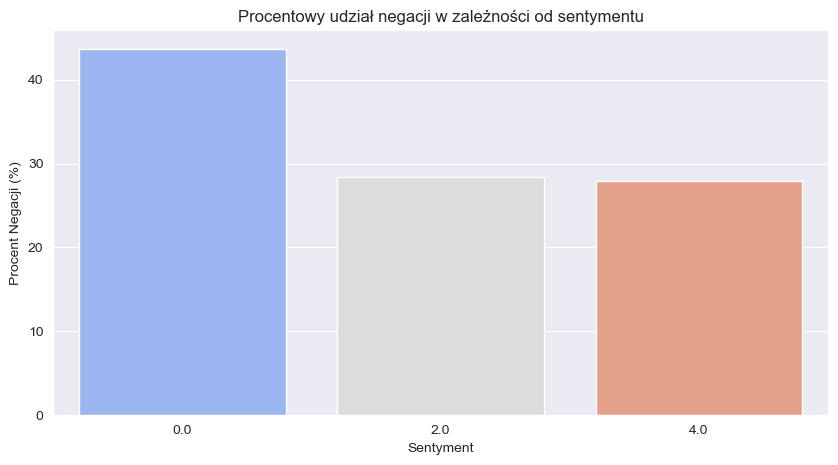

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Lista słów negujących**
negation_words = [
    "not", "never", "without", "no", "none", "n't", "nothing", "nobody", "nowhere", 
    "neither", "nor", "barely", "hardly", "scarcely", "rarely", "few", "little", 
    "least", "less", "lacking", "no one", "non", "cannot", "can't", "won't", 
    "doesn't", "isn't", "wasn't", "weren't", "shouldn't", "wouldn't", "couldn't", 
    "hadn't", "hasn't", "haven't", "didn't", "don't", "mightn't", "mustn't", "ain't"
]
# **Przykładowy dataset** (Zamień na swój)


df = pd.read_csv(r"C:\Users\User\PycharmProjects\sentiment\finaldata\przefiltrowanebezprezydentapowinnobycok.csv")

# **Zliczanie negacji w komentarzach**
def count_negations(text):
    return sum(1 for word in text.lower().split() if word in negation_words)

df["negation_count"] = df["text"].apply(count_negations)

# **Grupowanie według sentymentu**
negation_summary = df.groupby("sentiment")["negation_count"].sum()

# **Znormalizowanie do procentowego udziału**
negation_summary = (negation_summary / negation_summary.sum()) * 100

# **Wizualizacja wyników**
plt.figure(figsize=(10, 5))
sns.barplot(x=negation_summary.index, y=negation_summary.values, palette="coolwarm")
plt.title("Procentowy udział negacji w zależności od sentymentu")
plt.xlabel("Sentyment")
plt.ylabel("Procent Negacji (%)")
plt.savefig(r"C:\Users\User\PycharmProjects\sentiment\src\static\wykres11.svg", format="svg")

plt.show()